# EDA in Python

In [17]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
#First read the data
mydata = pd.read_excel("C:/Users/mmaha/Documents/cisa5320/data/Olympics/Olympics.xlsx")


In [29]:
#just gives few rows and heading
mydata.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,2,A Lamusi,M,23,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
1,16,Juhamatti Tapio Aaltonen,M,28,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
2,22,Andreea Aanei,F,22,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN
3,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30,187.0,76.0,France,FRA,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",NaN
4,48,Abdelhak Aatakni,M,24,NaN,64.0,Morocco,MAR,2012 Summer,2012,Summer,London,Boxing,Boxing Men's Light-Welterweight,NaN


## Bar chart

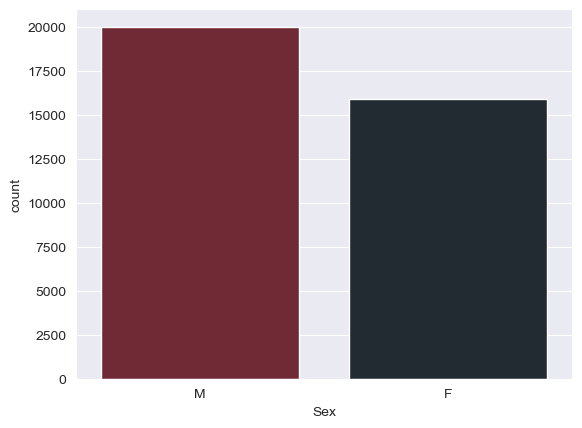

In [38]:
#Bar chart using seaborn library
sns.set_style('darkgrid')
sns.countplot(x='Sex', data=mydata)
plt.xticks(rotation=0)
plt.show() #just shows the image and remove other extra words

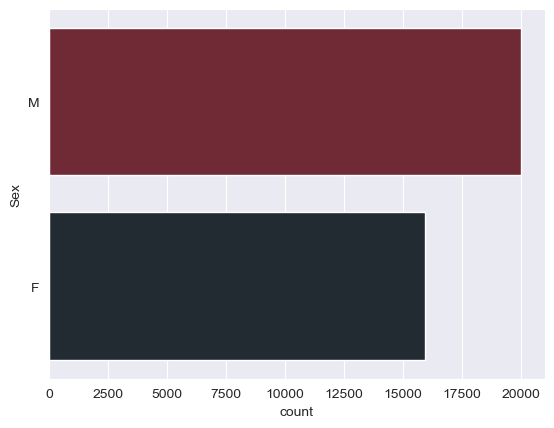

In [39]:
#for horizontal bar chart, change x to y
sns.countplot(y='Sex', data=mydata)
plt.xticks(rotation=0)
plt.show()

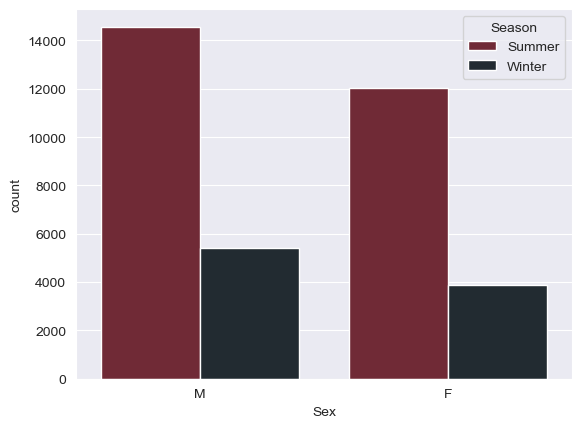

In [45]:
#cluster Bar chart using seaborn library - vertical
sns.countplot(x='Sex', hue='Season', data=mydata) #hue=season puts the another column named season
plt.xticks(rotation=0)
plt.show()

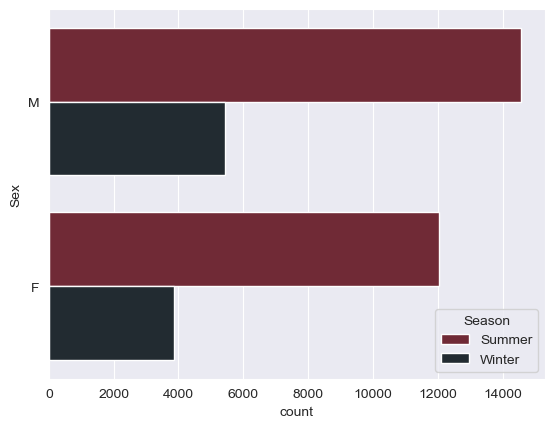

In [49]:
#cluster Bar chart using seaborn library - horizontal
#clustered side by side bar chart for two vars

sns.countplot(y='Sex', hue='Season', data=mydata)
plt.xticks(rotation=0)
plt.show()

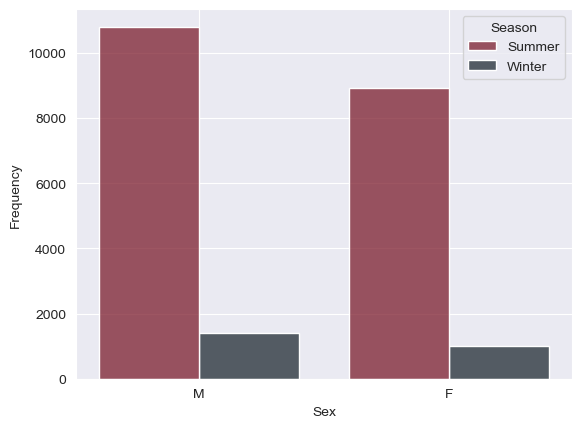

In [52]:
#stacked bar chart
#using sns.histplot() function
#discrete = true means they are like bar chart
#shrink to create space between charts
#using histogram function to manipulate and look like barchart.
sns.histplot(x='Sex', hue='Season',
    data=mydata, discrete=True, stat='frequency', multiple='dodge', shrink=0.8)
plt.show()

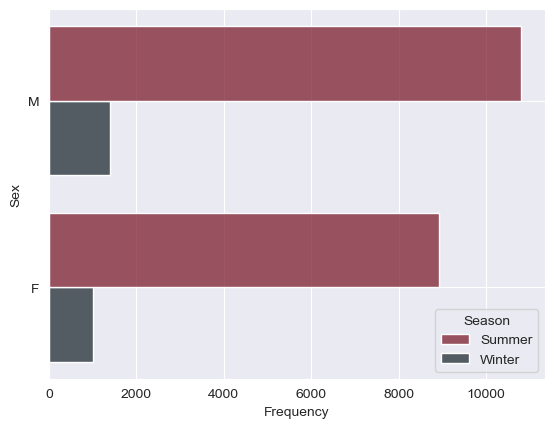

In [54]:
#using sns.histplot() function, clustered bar chart
sns.histplot(y='Sex', hue='Season',
           data=mydata, discrete=True, stat='frequency', multiple='dodge', shrink=0.8)
plt.show()

<Axes: xlabel='Count', ylabel='Sex'>

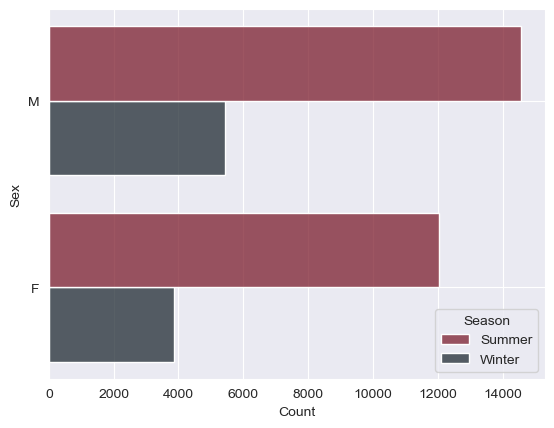

In [55]:
#Stacked barchart for two variables using sns.histplot() function
sns.histplot(y='Sex', hue='Season',
           data=mydata, discrete=True, multiple='dodge', shrink=0.8)

<Axes: xlabel='Sex', ylabel='Count'>

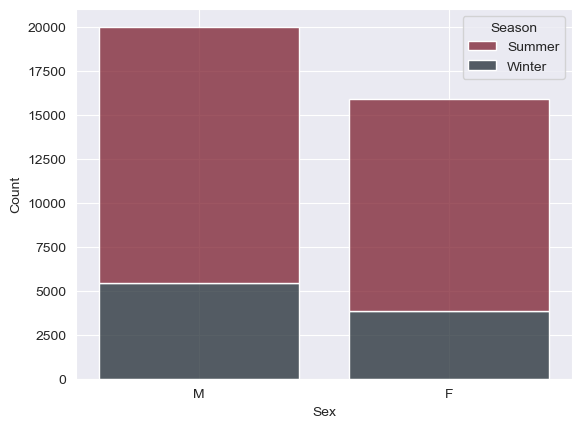

In [56]:
#Stacked barchart for two variables %100 fill

#Stacked barchart for two variables using sns.histplot() function
sns.histplot(x='Sex', hue='Season',
           data=mydata, discrete=True, multiple='stack', shrink=0.8)

# Histogram

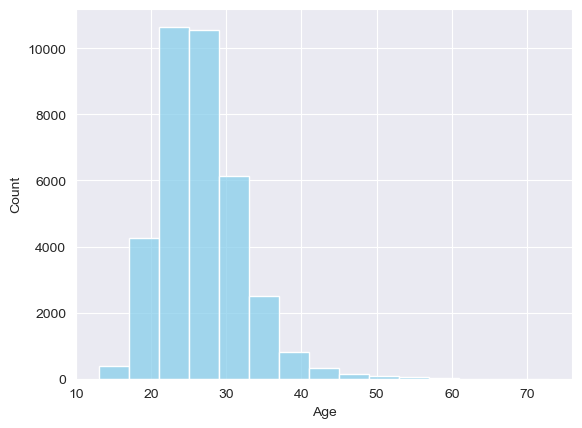

In [62]:
#Using seaborn
#we need numeric variable for histogram
#binwidth to merge the class
sns.set_style('darkgrid')
sns.histplot(x='Age', data=mydata, binwidth=4, color='skyblue')
plt.show()

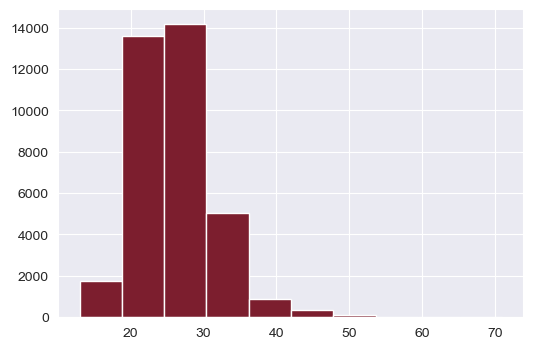

In [64]:
#using matplotlib
#nickname for matplotlib is plt
#it gives default bandwidth
#plt.figure should be mentioned to work.

plt.figure(figsize=(6,4))
plt.hist(x= 'Age', data=mydata)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

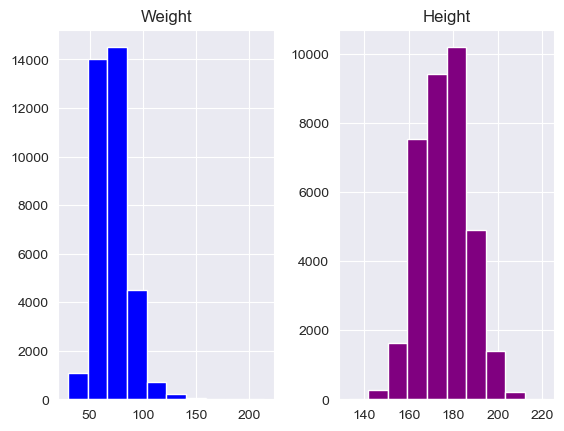

In [70]:
#Multiple histograms as subplots 

fig , axes=plt.subplots(1,2) #1 row 2 columns. first says how many rows and second shows how many columns

mydata.hist('Weight', ax=axes[0], color ='black') #0,0 indicates first row, first column
mydata.hist('Height', ax=axes[1], color='purple') #0, 1 indicates first row, second column

plt.show

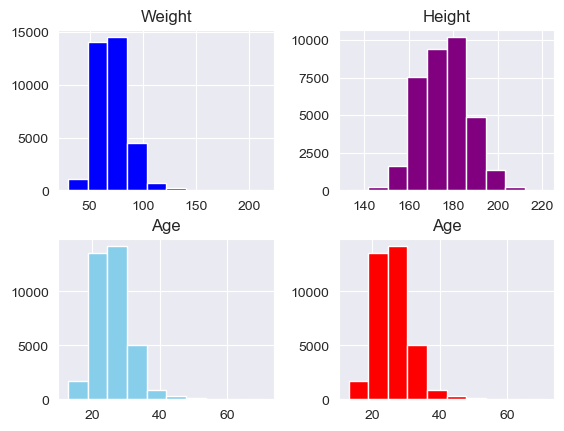

In [71]:
#Multiple histograms as subplots 
#Python is 0 base

fig , axes=plt.subplots(2,2) #1 row 2 columns. first says how many rows and second shows how many columns

mydata.hist('Weight', ax=axes[0,0], color ='blue') #0,0 indicates first row, first column
mydata.hist('Height', ax=axes[0,1], color='purple') #0, 1 indicates first row, second column
mydata.hist('Age', ax=axes[1,0], color='skyblue') #second row first column
mydata.hist('Age', ax=axes[1,1], color='red') #second row second column. Second because python is 0 base so 1 would be considered 2
plt.show()

## Pie chart

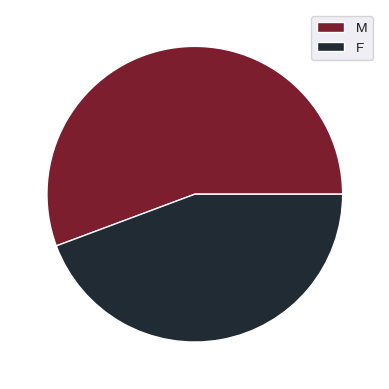

In [75]:
#basic pie chart using matplotlib
plt.pie(mydata['Sex'].value_counts())

#add legend
plt.legend(mydata['Sex'].unique())
plt.show()


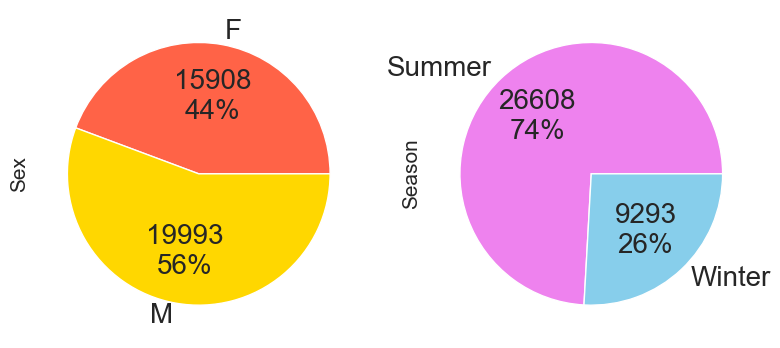

In [76]:
#pie chart using matplotlib
def label_function(val):
    return f'{val / 100 * len(mydata):.0f}\n{val:.0f}%'
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 5))

mydata.groupby('Sex').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['tomato', 'gold'], ax=ax1)
mydata.groupby('Season').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                 colors=['violet', 'skyblue'], ax=ax2)
ax1.set_ylabel('Sex', size=15)
ax2.set_ylabel('Season', size=15)
plt.tight_layout()
plt.show()

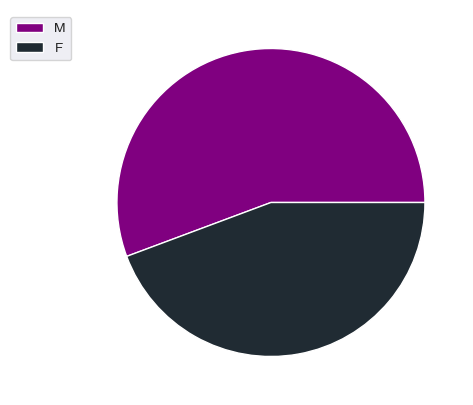

In [83]:
pal=['purple','#202B33',"#187878"] #set color palette, it will change the color and make a default. We can put it at the beginning.
sns.set_palette(pal)
plt.figure(figsize=(5,5))
plt.pie(mydata['Sex'].value_counts())
plt.legend(mydata['Sex'].unique(),bbox_to_anchor=(0.00, 1))
plt.show()

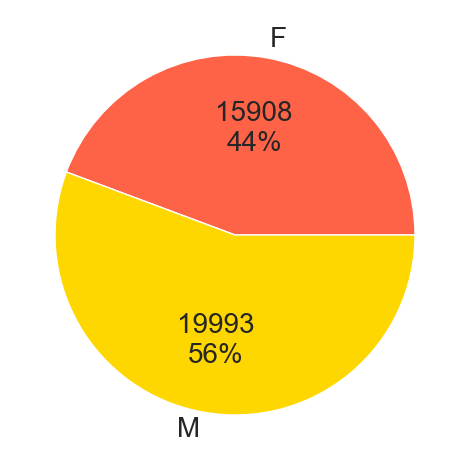

In [90]:
mydata.groupby('Sex').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['tomato', 'gold'])
ax1.set_ylabel('Sex', size=15)

plt.tight_layout()
plt.show()

## Box plot

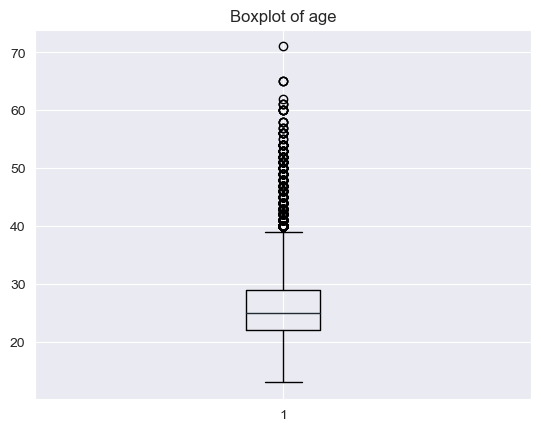

In [91]:
#Box plot for one variable
plt.boxplot(mydata['Age'])
plt.title('Boxplot of age')
plt.show()

<Axes: >

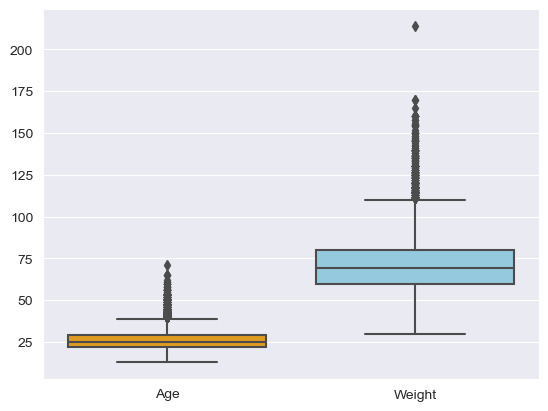

In [101]:
#Box plot of two variables in one graph
pal=['orange', 'skyblue']
sns.set_palette(pal)
sns.boxplot(data=mydata[['Age', 'Weight']]) # because there are two variables we are using two brackets

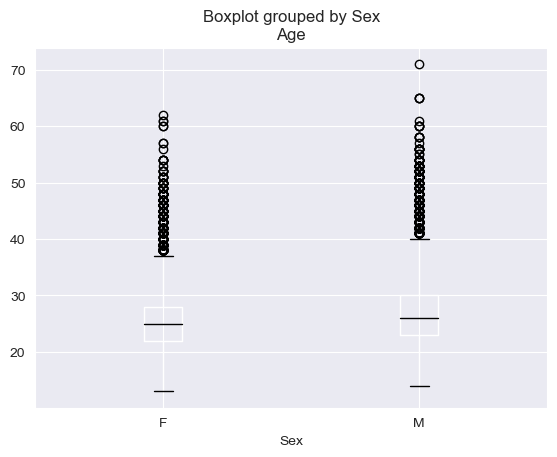

In [99]:
#Box plot based on different groups of sex
mydata.boxplot(column='Age', by='Sex')
plt.show()

## Scatter plot

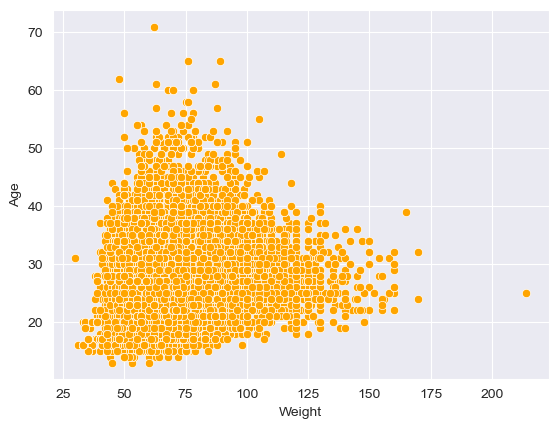

In [104]:
#Scatter plot with Seaborn
sns.scatterplot(x='Weight', y='Age', data=mydata)
plt.show()

In [60]:
#Scatterplot based on different groups


<Axes: xlabel='Weight', ylabel='Age'>

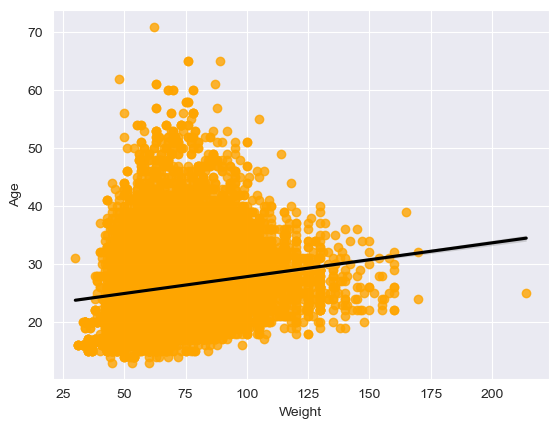

In [111]:
#Scatter plot using sns.regplot() function
sns.regplot(x='Weight', y='Age', data=mydata, line_kws={'color': 'black'}, scatter_kws={'color':'orange'})

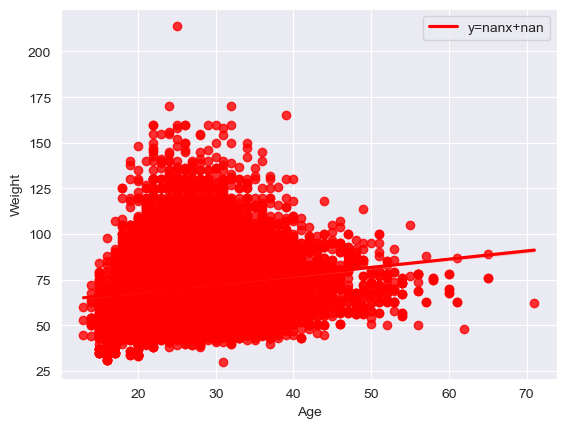

In [115]:
from scipy import stats 
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(mydata['Age'],mydata['Weight'])

# use line_kws to set line label for legend
ax = sns.regplot(x="Age", y="Weight", data=mydata, color='r', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()

plt.show()